In [1]:
import gzip
import pickle
import pandas as pd

from pymatgen.core import Structure
import py3Dmol

import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

from decifer_refactored.utility import generate_continuous_xrd_from_cif

from tqdm.auto import tqdm

In [2]:
def generate_dynamic_colors(elements):
    # Use seaborn color palette to generate distinct colors
    palette = sns.color_palette("husl", len(elements))
    return {element: mcolors.to_hex(color) for element, color in zip(elements, palette)}

In [3]:
file_path = "../experiments/model__conditioned_mlp_augmentation__context_3076/20k_comparison_files/deCIFer_(None_N-0p00_B-0p05).pkl.gz"
with gzip.open(file_path, 'rb') as f:
    df = pd.DataFrame(pickle.load(f))

In [4]:
df.keys()

Index(['rwp', 'wd', 'cif_sample', 'xrd_q_discrete_sample',
       'xrd_iq_discrete_sample', 'xrd_q_continuous_sample',
       'xrd_iq_continuous_sample', 'spacegroup_sym_sample',
       'spacegroup_num_sample', 'seq_len_sample', 'cif_gen',
       'xrd_q_discrete_gen', 'xrd_iq_discrete_gen', 'xrd_q_continuous_gen',
       'xrd_iq_continuous_gen', 'seq_len_gen', 'spacegroup_sym_gen',
       'spacegroup_num_gen', 'formula_validity', 'spacegroup_validity',
       'bond_length_validity', 'site_multiplicity_validity', 'validity'],
      dtype='object')

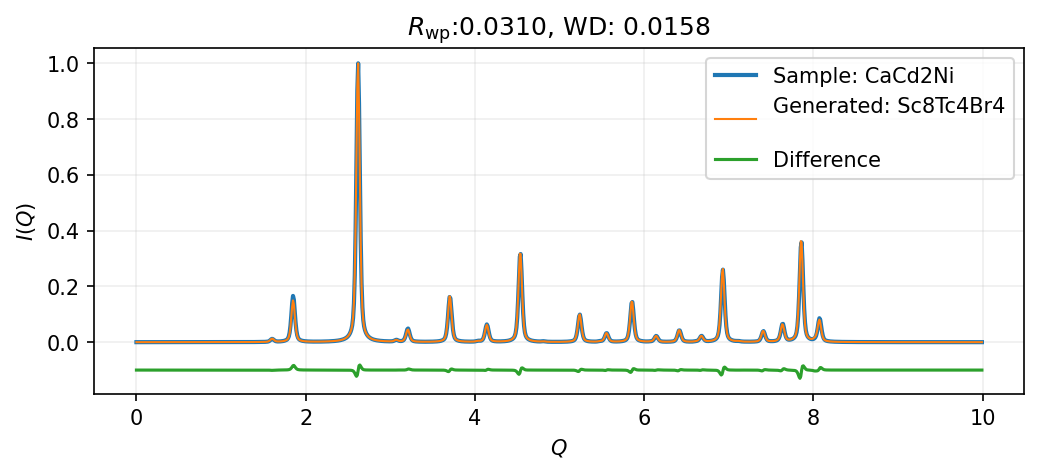

Full Formula (Ca4 Cd8 Ni4)
Reduced Formula: CaCd2Ni
abc   :   6.785700   6.785700   6.785700
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (16)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Ca    0     0     0.5
  1  Ca    0.5   0     0
  2  Ca    0     0.5   0
  3  Ca    0.5   0.5   0.5
  4  Cd    0.25  0.25  0.25
  5  Cd    0.75  0.75  0.75
  6  Cd    0.75  0.25  0.25
  7  Cd    0.25  0.75  0.75
  8  Cd    0.75  0.75  0.25
  9  Cd    0.25  0.25  0.75
 10  Cd    0.25  0.75  0.25
 11  Cd    0.75  0.25  0.75
 12  Ni    0     0     0
 13  Ni    0.5   0.5   0
 14  Ni    0.5   0     0.5
 15  Ni    0     0.5   0.5
Full Formula (Sc8 Tc4 Br4)
Reduced Formula: Sc2TcBr
abc   :   6.787700   6.787700   6.787700
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (16)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Sc    0.75  0.25  0.75
  1  Sc    0.75  0.25  0.25
  2  Sc    0.75  0.75  0.25


In [70]:
file_path = "../experiments/model__conditioned_mlp_augmentation__context_3076/20k_comparison_files/deCIFer_(None_N-0p00_B-0p05).pkl.gz"
with gzip.open(file_path, 'rb') as f:
    df = pd.DataFrame(pickle.load(f))

for i, row in df.iterrows():
    if (row['rwp'] < 0.05) and (145 <= row['spacegroup_num_gen'] >= 75):

        # Extract CIFs
        cif_sample = row['cif_sample']
        cif_gen = row['cif_gen']

        # Make structures
        structure_sample = Structure.from_str(cif_sample, fmt="cif")
        structure_gen = Structure.from_str(cif_gen, fmt="cif")

        # Extract XRD
        q_sample, iq_sample = row['xrd_q_discrete_sample'], row['xrd_iq_discrete_sample']
        q_gen, iq_gen = row['xrd_q_discrete_gen'], row['xrd_iq_discrete_gen']

        # Rwp and WD
        rwp = row['rwp']
        wd = row['wd']
        
        break

xrd_sample = generate_continuous_xrd_from_cif(
    cif_sample,
    qmax=10.0,
    structure_name = 'sample',
    mask_prob = None,
    noise_range = None,
    fwhm_range = (0.05, 0.05)
)

xrd_gen = generate_continuous_xrd_from_cif(
    cif_gen,
    qmax=10.0,
    structure_name = 'gen',
    mask_prob = None,
    noise_range = None,
    fwhm_range = (0.05, 0.05)
)

fig, ax = plt.subplots(figsize=(8,3), dpi=150)
m = 1000
mm = 0
# ax.plot(q_sample[mm:m], iq_sample[mm:m], lw=2, label=f'Sample: {cif_sample[32:39]}')
# ax.plot(q_gen[mm:m], iq_gen[mm:m], lw=1, label=f'Generated: {cif_gen[5:13]}')

ax.plot(xrd_sample['q'][mm:m], xrd_sample['iq'][mm:m], lw=2, label=f'Sample: {cif_sample[32:39]}')
ax.plot(xrd_gen['q'][mm:m], xrd_gen['iq'][mm:m], lw=1, label=f'Generated: {cif_gen[5:15]}')

ax.plot(xrd_sample['q'][mm:m], xrd_sample['iq'][mm:m] - xrd_gen['iq'][mm:m] - 0.1, label='Difference')

# ax.bar(q_sample, iq_sample,width=0.01, label=f'Sample: {cif_sample[32:39]}')
# ax.bar(q_gen, iq_gen, width=0.01,label=f'Generated: {cif_gen[5:13]}')

ax.set(xlabel='$Q$', ylabel='$I(Q)$')
ax.grid(alpha=0.2)
ax.legend()
ax.set_title("$R_{\\mathrm{wp}}$:"+f"{rwp:1.4f}, " + f"WD: {wd:1.4f}")
plt.show()

print(structure_sample)

print(structure_gen)

In [74]:
file_path = "../experiments/model__conditioned_mlp_augmentation__context_3076/20k_comparison_files/deCIFer_(Comp_N-0p00_B-0p05).pkl.gz"
with gzip.open(file_path, 'rb') as f:
    df = pd.DataFrame(pickle.load(f))

num = 0
pbar = tqdm(total=len(df))
for i, row in df.iterrows():
    cif_sample = row['cif_sample']
    cif_gen = row['cif_gen']
    structure_sample = Structure.from_str(cif_sample, fmt="cif")
    structure_gen = Structure.from_str(cif_gen, fmt="cif")
    rwp_2 = row['rwp']
    print(rwp_2)
    wd_2 = row['wd']

    if cif_sample[32:].startswith('CaCd2Ni'):
        break

    pbar.update(1)

xrd_sample_2 = generate_continuous_xrd_from_cif(
    cif_sample,
    qmax=10.0,
    structure_name = 'sample',
    mask_prob = None,
    noise_range = None,
    fwhm_range = (0.05, 0.05)
)

xrd_gen_2 = generate_continuous_xrd_from_cif(
    cif_gen,
    qmax=10.0,
    structure_name = 'gen',
    mask_prob = None,
    noise_range = None,
    fwhm_range = (0.05, 0.05)
)

  0%|          | 0/19932 [00:00<?, ?it/s]

0.23212341964244843
1.2817200422286987
0.9912246465682983
0.10853947699069977
0.044152092188596725
0.07314123958349228
0.6488669514656067
0.11623245477676392
0.05038396269083023
0.4593850374221802
0.7841774225234985
0.04230682551860809


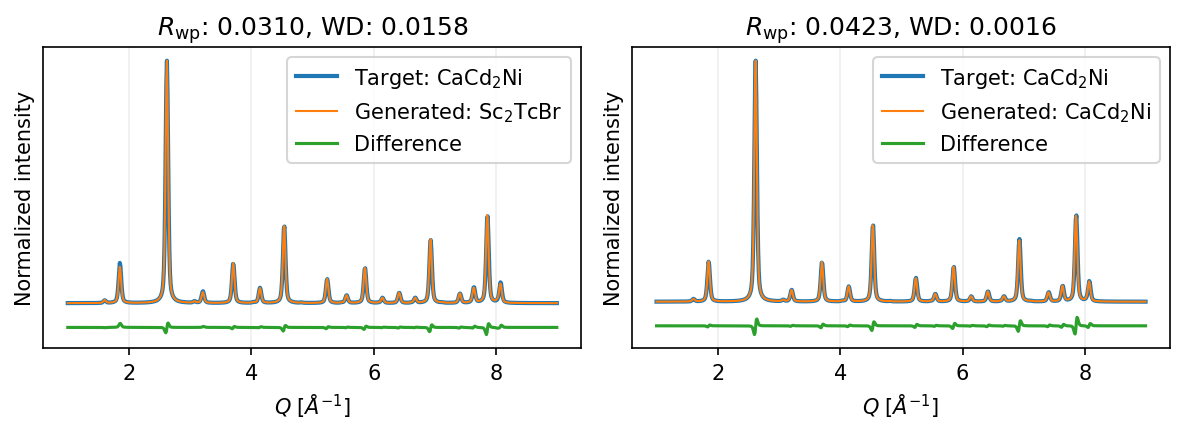

In [76]:
fig, (ax, ax2) = plt.subplots(1,2,figsize=(8,3), dpi=150)
m = 900
mm = 100

ax.plot(xrd_sample['q'][mm:m], xrd_sample['iq'][mm:m], lw=2, label=f'Target: CaCd$_2$Ni')
ax.plot(xrd_gen['q'][mm:m], xrd_gen['iq'][mm:m], lw=1, label=f'Generated: Sc$_2$TcBr')

ax.plot(xrd_sample['q'][mm:m], xrd_sample['iq'][mm:m] - xrd_gen['iq'][mm:m] - 0.1, label='Difference')

ax.set(xlabel='$Q\;[Å^{-1}]$', ylabel='Normalized intensity')
ax.grid(alpha=0.2)

ax2.plot(xrd_sample_2['q'][mm:m], xrd_sample_2['iq'][mm:m], lw=2, label=f'Target: CaCd$_2$Ni')
ax2.plot(xrd_gen_2['q'][mm:m], xrd_gen_2['iq'][mm:m], lw=1, label=f'Generated: CaCd$_2$Ni')

ax2.plot(xrd_sample_2['q'][mm:m], xrd_sample_2['iq'][mm:m] - xrd_gen_2['iq'][mm:m] - 0.1, label='Difference')

ax2.set(xlabel='$Q\;[Å^{-1}]$', ylabel='Normalized intensity')
ax2.grid(alpha=0.2)


ax.legend()
ax.set_yticks([])
ax2.legend()
ax2.set_yticks([])
ax.set_title("$R_{\\mathrm{wp}}$: "+f"{rwp:1.4f}, " + f"WD: {wd:1.4f}")
ax2.set_title("$R_{\\mathrm{wp}}$: "+f"{rwp_2:1.4f}, " + f"WD: {wd_2:1.4f}")

fig.tight_layout()
plt.show()

fig.savefig("CaCd2Ni.png", transparent=True)

# print(structure_sample)

# print(structure_gen)

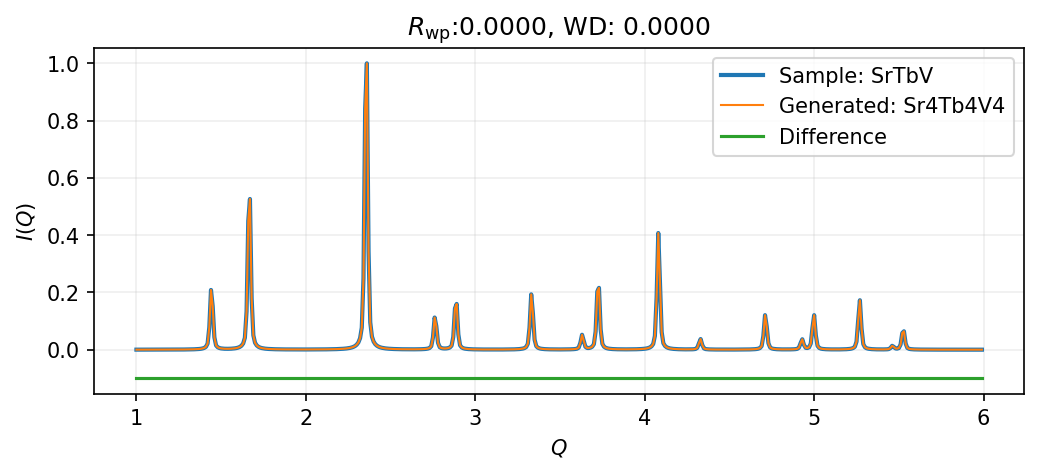

Full Formula (Sr4 Tb4 V4)
Reduced Formula: SrTbV
abc   :   7.542600   7.542600   7.542600
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (12)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Sr    0.25  0.25  0.75
  1  Sr    0.25  0.75  0.25
  2  Sr    0.75  0.75  0.75
  3  Sr    0.75  0.25  0.25
  4  Tb    0.25  0.25  0.25
  5  Tb    0.25  0.75  0.75
  6  Tb    0.75  0.75  0.25
  7  Tb    0.75  0.25  0.75
  8  V     0     0     0
  9  V     0.5   0.5   0
 10  V     0.5   0     0.5
 11  V     0     0.5   0.5
# generated using pymatgen
data_SrTbV
loop_
 _atom_type_symbol
 _atom_type_electronegativity
 _atom_type_radius
 _atom_type_ionic_radius
  Sr  0.9500  2.0000  1.3200
  Tb  1.1000  1.7500  0.9815
  V  1.6300  1.3500  0.7775
_symmetry_space_group_name_H-M   F-43m
_cell_length_a   7.5426
_cell_length_b   7.5426
_cell_length_c   7.5426
_cell_angle_alpha   90.0000
_cell_angle_beta   90.0000
_cell_angle_gamma   90.0000
_symmetry_Int_Ta

In [6]:
for i, row in df.iterrows():
    if (row['rwp'] < 0.001) and (145 <= row['spacegroup_num_gen'] >= 75):

        # Extract CIFs
        cif_sample = row['cif_sample']
        cif_gen = row['cif_gen']

        # Make structures
        structure_sample = Structure.from_str(cif_sample, fmt="cif")
        structure_gen = Structure.from_str(cif_gen, fmt="cif")

        # Extract XRD
        q_sample, iq_sample = row['xrd_q_discrete_sample'], row['xrd_iq_discrete_sample']
        q_gen, iq_gen = row['xrd_q_discrete_gen'], row['xrd_iq_discrete_gen']

        # Rwp and WD
        rwp = row['rwp']
        wd = row['wd']
        
        break

xrd_sample = generate_continuous_xrd_from_cif(
    cif_sample,
    structure_name = 'sample',
    mask_prob = None,
    noise_range = None,
    fwhm_range = (0.02, 0.02)
)

xrd_gen = generate_continuous_xrd_from_cif(
    cif_gen,
    structure_name = 'gen',
    mask_prob = None,
    noise_range = None,
    fwhm_range = (0.02, 0.02)
)

fig, ax = plt.subplots(figsize=(8,3), dpi=150)
m = 600
mm = 100
# ax.plot(q_sample[mm:m], iq_sample[mm:m], lw=2, label=f'Sample: {cif_sample[32:39]}')
# ax.plot(q_gen[mm:m], iq_gen[mm:m], lw=1, label=f'Generated: {cif_gen[5:13]}')

ax.plot(xrd_sample['q'][mm:m], xrd_sample['iq'][mm:m], lw=2, label=f'Sample: {cif_sample[32:37]}')
ax.plot(xrd_gen['q'][mm:m], xrd_gen['iq'][mm:m], lw=1, label=f'Generated: {cif_gen[5:13]}')

ax.plot(xrd_sample['q'][mm:m], xrd_sample['iq'][mm:m] - xrd_gen['iq'][mm:m] - 0.1, label='Difference')

# ax.bar(q_sample, iq_sample,width=0.01, label=f'Sample: {cif_sample[32:39]}')
# ax.bar(q_gen, iq_gen, width=0.01,label=f'Generated: {cif_gen[5:13]}')

ax.set(xlabel='$Q$', ylabel='$I(Q)$')
ax.grid(alpha=0.2)
ax.legend()
ax.set_title("$R_{\\mathrm{wp}}$:"+f"{rwp:1.4f}, " + f"WD: {wd:1.4f}")
plt.show()

print(structure_sample)
print(cif_sample)

print(structure_gen)
print(cif_gen)

  0%|          | 0/19932 [00:00<?, ?it/s]

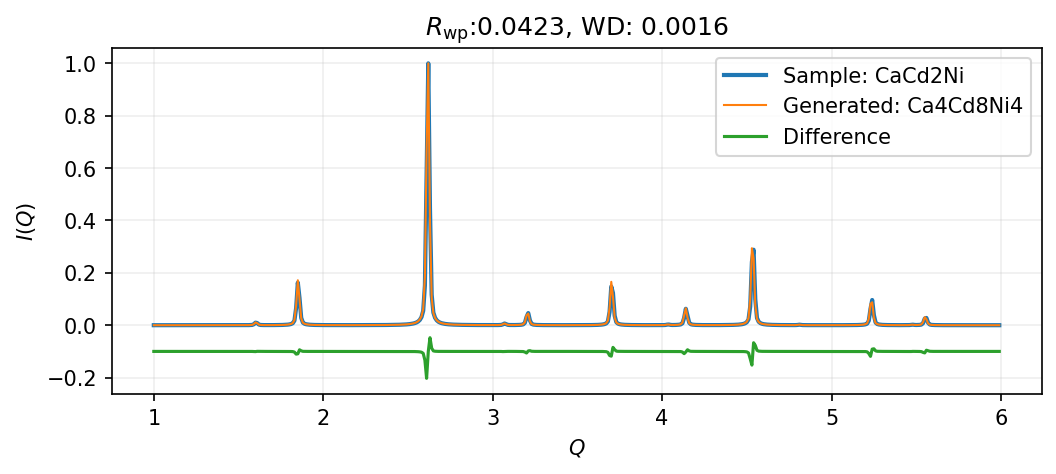

Full Formula (Ca4 Cd8 Ni4)
Reduced Formula: CaCd2Ni
abc   :   6.785700   6.785700   6.785700
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (16)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Ca    0     0     0.5
  1  Ca    0.5   0     0
  2  Ca    0     0.5   0
  3  Ca    0.5   0.5   0.5
  4  Cd    0.25  0.25  0.25
  5  Cd    0.75  0.75  0.75
  6  Cd    0.75  0.25  0.25
  7  Cd    0.25  0.75  0.75
  8  Cd    0.75  0.75  0.25
  9  Cd    0.25  0.25  0.75
 10  Cd    0.25  0.75  0.25
 11  Cd    0.75  0.25  0.75
 12  Ni    0     0     0
 13  Ni    0.5   0.5   0
 14  Ni    0.5   0     0.5
 15  Ni    0     0.5   0.5
# generated using pymatgen
data_CaCd2Ni
loop_
 _atom_type_symbol
 _atom_type_electronegativity
 _atom_type_radius
 _atom_type_ionic_radius
  Ca  1.0000  1.8000  1.1400
  Cd  1.6900  1.5500  1.0900
  Ni  1.9100  1.3500  0.7400
_symmetry_space_group_name_H-M   Fm-3m
_cell_length_a   6.7857
_cell_length_b   6.7857
_cell_length_

In [11]:
file_path = "../experiments/model__conditioned_mlp_augmentation__context_3076/20k_comparison_files/deCIFer_(Comp_N-0p00_B-0p05).pkl.gz"
with gzip.open(file_path, 'rb') as f:
    df = pd.DataFrame(pickle.load(f))

num = 0
pbar = tqdm(total=len(df))
for i, row in df.iterrows():
    # if (row['rwp'] < 0.1):# and (145 <= row['spacegroup_num_gen'] >= 75):

    #     # Extract CIFs
    #     cif_sample = row['cif_sample']
    #     cif_gen = row['cif_gen']



    #     # Extract XRD
    #     q_sample, iq_sample = row['xrd_q_discrete_sample'], row['xrd_iq_discrete_sample']
    #     q_gen, iq_gen = row['xrd_q_discrete_gen'], row['xrd_iq_discrete_gen']

    #     # Rwp and WD
    #     rwp = row['rwp']
    #     wd = row['wd']

        # print(cif_sample[32:37])
        # if cif_sample[32:37] == 'SrTbV':
        #     break

        # if num == 7:
        #     break
        # num += 1
    cif_sample = row['cif_sample']
    cif_gen = row['cif_gen']
    structure_sample = Structure.from_str(cif_sample, fmt="cif")
    structure_gen = Structure.from_str(cif_gen, fmt="cif")
    rwp = row['rwp']
    wd = row['wd']

    if cif_sample[32:].startswith('CaCd2Ni'):
        break

    pbar.update(1)

xrd_sample = generate_continuous_xrd_from_cif(
    cif_sample,
    structure_name = 'sample',
    mask_prob = None,
    noise_range = None,
    fwhm_range = (0.02, 0.02)
)

xrd_gen = generate_continuous_xrd_from_cif(
    cif_gen,
    structure_name = 'gen',
    mask_prob = None,
    noise_range = None,
    fwhm_range = (0.02, 0.02)
)

fig, ax = plt.subplots(figsize=(8,3), dpi=150)
m = 600
mm = 100
# ax.plot(q_sample[mm:m], iq_sample[mm:m], lw=2, label=f'Sample: {cif_sample[32:39]}')
# ax.plot(q_gen[mm:m], iq_gen[mm:m], lw=1, label=f'Generated: {cif_gen[5:13]}')

ax.plot(xrd_sample['q'][mm:m], xrd_sample['iq'][mm:m], lw=2, label=f'Sample: {cif_sample[32:39]}')
ax.plot(xrd_gen['q'][mm:m], xrd_gen['iq'][mm:m], lw=1, label=f'Generated: {cif_gen[5:14]}')

ax.plot(xrd_sample['q'][mm:m], xrd_sample['iq'][mm:m] - xrd_gen['iq'][mm:m] - 0.1, label='Difference')

# ax.bar(q_sample, iq_sample,width=0.01, label=f'Sample: {cif_sample[32:39]}')
# ax.bar(q_gen, iq_gen, width=0.01,label=f'Generated: {cif_gen[5:13]}')

ax.set(xlabel='$Q$', ylabel='$I(Q)$')
ax.grid(alpha=0.2)
ax.legend()
ax.set_title("$R_{\\mathrm{wp}}$:"+f"{rwp:1.4f}, " + f"WD: {wd:1.4f}")
plt.show()

print(structure_sample)
print(cif_sample)

print(structure_gen)
print(cif_gen)

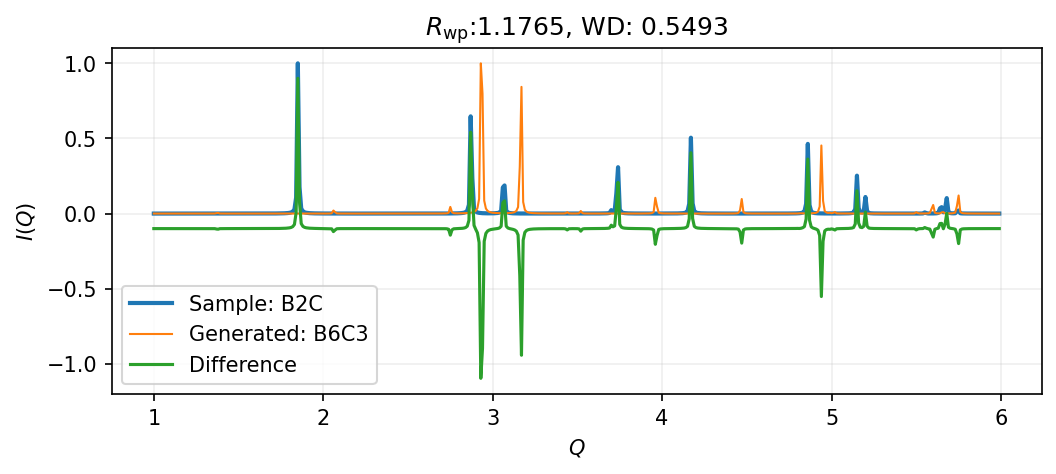

Full Formula (B6 C3)
Reduced Formula: B2C
abc   :   2.585800   2.585800  10.183500
angles:  90.000000  90.000000 120.000000
pbc   :       True       True       True
Sites (9)
  #  SP           a         b         c
---  ----  --------  --------  --------
  0  B     0         0         0.5851
  1  B     0.666667  0.333333  0.918433
  2  B     0.333333  0.666667  0.251767
  3  B     0         0         0.7488
  4  B     0.666667  0.333333  0.082133
  5  B     0.333333  0.666667  0.415467
  6  C     0         0         0.9994
  7  C     0.666667  0.333333  0.332733
  8  C     0.333333  0.666667  0.666067
# generated using pymatgen
data_B2C
loop_
 _atom_type_symbol
 _atom_type_electronegativity
 _atom_type_radius
 _atom_type_ionic_radius
  B  2.0400  0.8500  0.4100
  C  2.5500  0.7000  0.3000
_symmetry_space_group_name_H-M   R3m
_cell_length_a   2.5858
_cell_length_b   2.5858
_cell_length_c   10.1835
_cell_angle_alpha   90.0000
_cell_angle_beta   90.0000
_cell_angle_gamma   120.0000
_symme

In [14]:
for i, row in df.iterrows():
    if (row['rwp'] > 1) and (145 <= row['spacegroup_num_gen'] >= 75):

        # Extract CIFs
        cif_sample = row['cif_sample']
        cif_gen = row['cif_gen']

        # Make structures
        structure_sample = Structure.from_str(cif_sample, fmt="cif")
        structure_gen = Structure.from_str(cif_gen, fmt="cif")

        # Extract XRD
        q_sample, iq_sample = row['xrd_q_continuous_sample'], row['xrd_iq_continuous_sample']
        q_gen, iq_gen = row['xrd_q_continuous_gen'], row['xrd_iq_continuous_gen']

        # Rwp and WD
        rwp = row['rwp']
        wd = row['wd']
        
        break
        
xrd_sample = generate_continuous_xrd_from_cif(
    cif_sample,
    structure_name = 'sample',
    mask_prob = None,
    noise_range = None,
    fwhm_range = (0.01, 0.01)
)

xrd_gen = generate_continuous_xrd_from_cif(
    cif_gen,
    structure_name = 'gen',
    mask_prob = None,
    noise_range = None,
    fwhm_range = (0.01, 0.01)
)

fig, ax = plt.subplots(figsize=(8,3), dpi=150)
m = 600
mm = 100
# ax.plot(q_sample[mm:m], iq_sample[mm:m], lw=2, label=f'Sample: {cif_sample[32:39]}')
# ax.plot(q_gen[mm:m], iq_gen[mm:m], lw=1, label=f'Generated: {cif_gen[5:13]}')

ax.plot(xrd_sample['q'][mm:m], xrd_sample['iq'][mm:m], lw=2, label=f'Sample: {cif_sample[32:35]}')
ax.plot(xrd_gen['q'][mm:m], xrd_gen['iq'][mm:m], lw=1, label=f'Generated: {cif_gen[5:9]}')

ax.plot(xrd_sample['q'][mm:m], xrd_sample['iq'][mm:m] - xrd_gen['iq'][mm:m] - 0.1, label='Difference')

ax.set(xlabel='$Q$', ylabel='$I(Q)$')
ax.grid(alpha=0.2)
ax.legend()
ax.set_title("$R_{\\mathrm{wp}}$:"+f"{rwp:1.4f}, " + f"WD: {wd:1.4f}")
plt.show()

print(structure_sample)
print(cif_sample)
print(structure_gen)
print(cif_gen)

In [60]:
# Get unique elements for coloring
unique_elements = [str(el) for el in structure_sample.species]
dynamic_colors = generate_dynamic_colors(set(unique_elements))

# Visualize the unit cell
view = py3Dmol.view(width=300, height=300)
view.addModel(cif_sample, 'cif')
view.setStyle({'stick': {'radius': 0.1}, 'sphere': {'scale': 0.3}})

# Add the unit cell box
view.addUnitCell()

# Apply dynamic colors to the atoms based on their types
for element in set(unique_elements):
    color = dynamic_colors[element]
    view.setStyle({'elem': element}, {'sphere': {'scale': 0.3, 'color': color}})
view.zoomTo()

# Insert visualization using safe IDs
view.insert('unit')

3Dmol.js failed to load for some reason. Please check your browser console for error messages.